In [57]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import datetime,os,warnings,csv

import torch
from torch import functional as F
from torch import optim

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

import astropy.units as u
from astropy import coordinates as coord

from astroquery import vizier as V
from astroquery import skyview as sv

from scipy import ndimage

In [6]:
view = sv.SkyView()

In [45]:
surveys = view.survey_dict

In [116]:
c = coord.SkyCoord(15,50,unit=('deg','deg'),frame='icrs')

paths = view.get_images(position=c,survey=[
    'DSS',
    'DSS1 Blue', 
    'DSS1 Red',
    'DSS2 Red',
    'DSS2 Blue',
    'DSS2 IR'
])

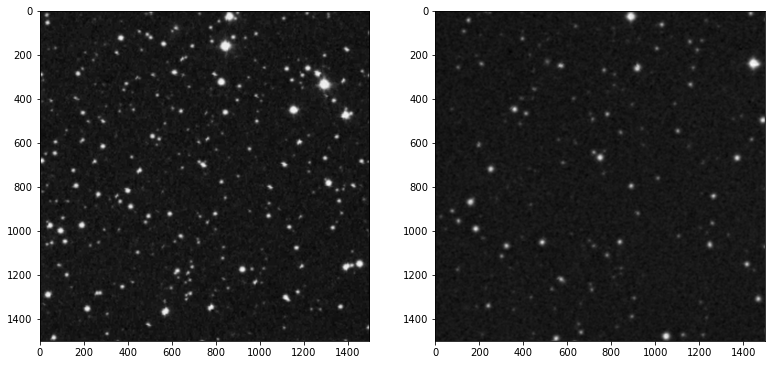

In [126]:
img = paths[-1][0].data

fig,ax = plt.subplots(1,2,figsize=(13,13))

ax[0].imshow(ndimage.zoom(paths[0][0].data,5),cmap='gray')
ax[1].imshow(ndimage.zoom(paths[-1][0].data,5),cmap='gray')

plt.show()